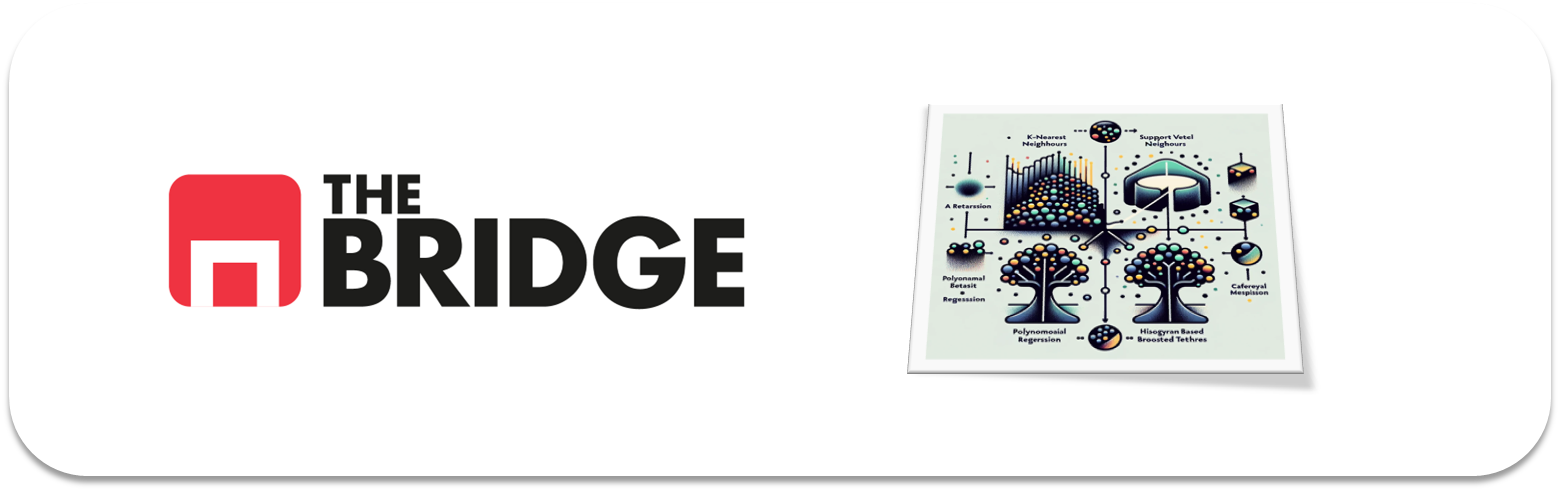

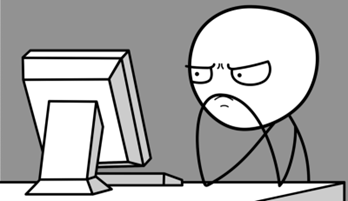

Para ejercitarte y afianzar lo aprendido sobre **Otros Modelos de aprendizaje supervisado**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## PARTE 1. KNN

En la primera parte  vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating (ojo, no el sentimiento), en función del sentimiento del comentario y su valor y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

### Ejercicio 1

Lee el archivo de entrada "reviews_sentiment.csv" y carga su contenido en un dataframe. Muestras sus primeras líneas, su información general y define una variable "target" asignándole el nombre de la columna que contenga el target del problema. 

In [8]:
df = pd.read_csv('./data/reviews_sentiment.csv', sep = ';')


In [9]:
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [11]:
target = 'Star Rating'


### Ejericicio 2

Muestra la distribución del target y coméntala brevemente.

Star Rating
5    88
3    78
1    37
4    30
2    24
Name: count, dtype: int64


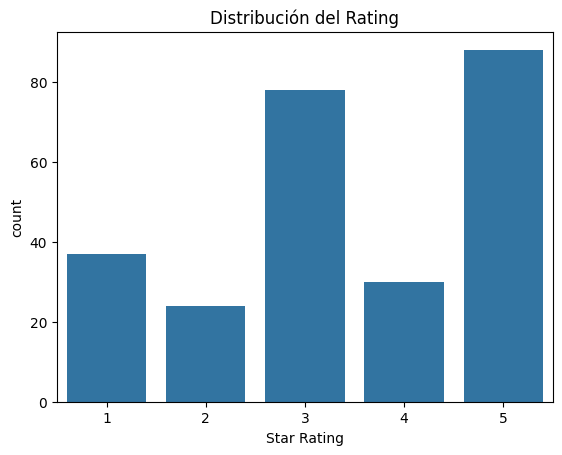

In [12]:
# Mostrar la distribución del target
target_distribution = df[target].value_counts()
print(target_distribution)

# Visualizar la distribución
sns.countplot(x=target, data=df)
plt.title('Distribución del Rating')
plt.show()

# Comentario
# Observamos la distribución de las estrellas. Si está desbalanceada, podría afectar el rendimiento del modelo.


### Ejercicio 3

Deshazte de la columna "titleSentiment" que tiene nulos y no vamos a emplearla.

In [13]:
df = df.drop(columns=['titleSentiment'], errors='ignore') 


### Ejercicio 4

Haz el split en train y test.

In [14]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Ejercicio 5

Muestra la descripción de las variables que consideres numéricas (justificando tu elección) y sus histogramas. ¿Hay que aplicar alguna transformación o tratamiento? (Recuerda que vamos a emplear un KNN)

        wordcount  sentimentValue
count  205.000000      205.000000
mean    11.560976        0.363753
std     13.768479        0.857533
min      1.000000       -2.276469
25%      3.000000       -0.116132
50%      7.000000        0.246869
75%     16.000000        0.794211
max    103.000000        3.264579


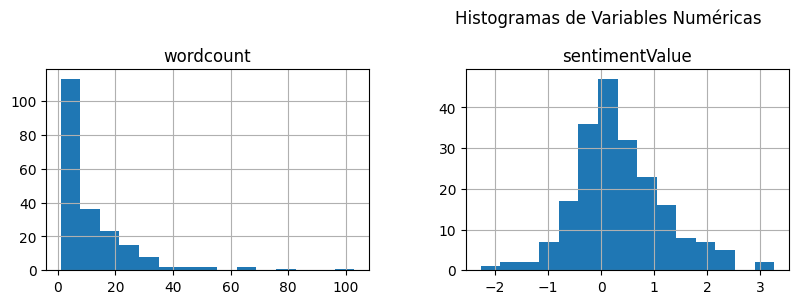

In [15]:
# Describir variables numéricas
num_columns = X_train.select_dtypes(include=[np.number]).columns
print(X_train[num_columns].describe())

# Mostrar histogramas
X_train[num_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Comentario sobre transformaciones
# Dependiendo de la distribución, podríamos necesitar aplicar transformaciones, como logaritmos o escalado.


### Ejercicio 6

Muestra la distribución frecuencial de las variables que consideres categóricas. ¿Habrías que hacerles algún tipo de tratamiento?

Distribución de Review Title:
Review Title
Muy buena                      16
Buena                          12
Genial                          5
Muy util                        4
Me gusta                        3
                               ..
Me indica una nueva version     1
Me encanta!                     1
👍                               1
Ahora si va mucho mejor         1
Mola                            1
Name: count, Length: 158, dtype: int64


C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


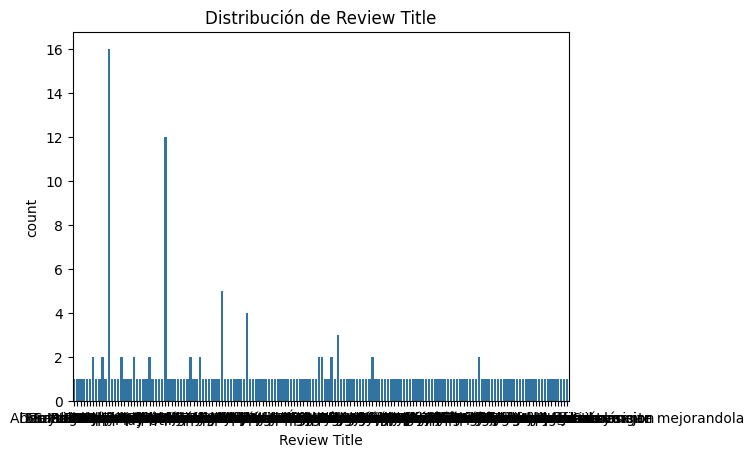

Distribución de Review Text:
Review Text
…                                                                                                                                               9
Mola                                                                                                                                            2
Recomendable                                                                                                                                    2
A…                                                                                                                                              1
Va de escándalo                                                                                                                                 1
                                                                                                                                               ..
Dice que existe una nueva version, pero no sale actualizacion, e probado a borrarla

C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


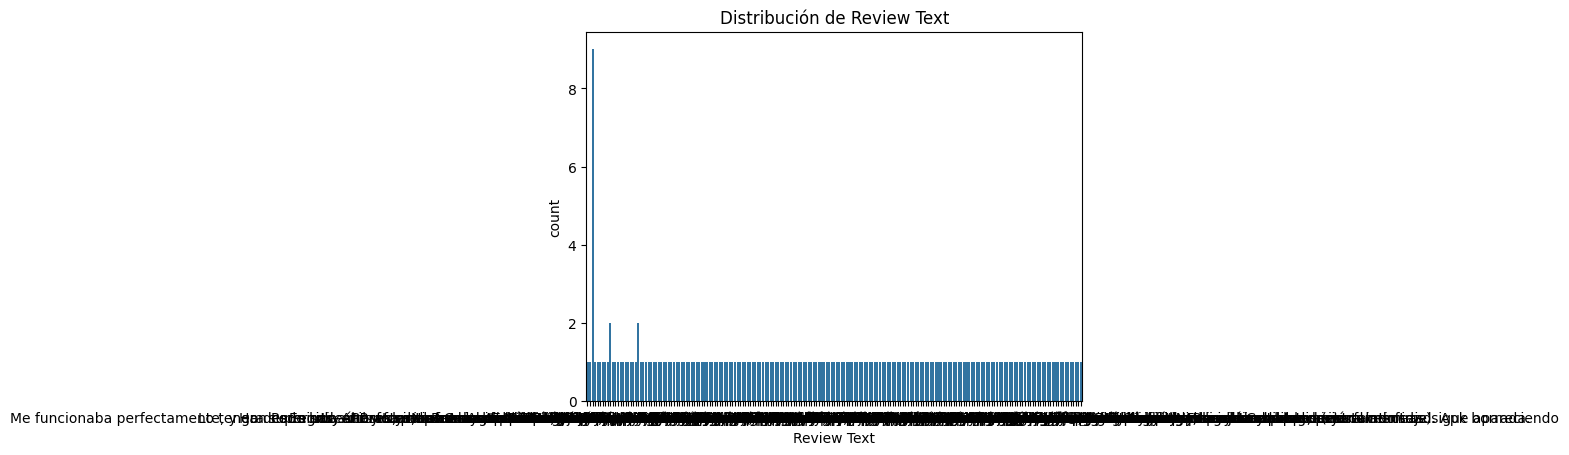

Distribución de textSentiment:
textSentiment
positive    168
negative     37
Name: count, dtype: int64


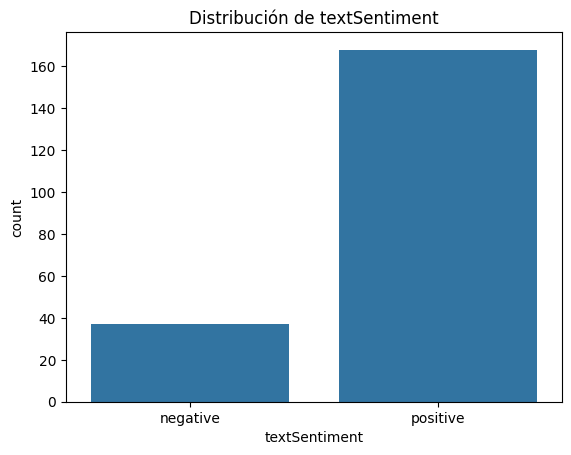

In [16]:
# Distribución de variables categóricas
cat_columns = X_train.select_dtypes(include=['object']).columns
for col in cat_columns:
    print(f'Distribución de {col}:')
    print(X_train[col].value_counts())
    sns.countplot(x=X_train[col])
    plt.title(f'Distribución de {col}')
    plt.show()

# Las variables categóricas necesitarán un tratamiento como codificación, tal vez Ordinal o One-Hot.


### Ejercicio 7

En un modelado completo habríamos comprobado la relación entre las features y el targer, para estos ejercicios, las vamos a incluir sí o si. Haz el tratamiento de features, haciendo la conversión ordinal de la binaria (usa 1 para positive y 0 para negative) y aplicando el escalado que creas más conveniente en consecuencia para las numéricas

In [23]:
# Convertir sentimiento binario
X['textSentiment'] = X['textSentiment'].map({'positive': 1, 'negative': 0})

# Escalado de variables numéricas
scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])


### Ejercicio 8

Crea el juego X,y de train y test. Carga el modelo, instancialo con un k=5 para empezar y entrénalo.

In [24]:
# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


ValueError: could not convert string to float: 'Ta to guapa.'

### Ejercicio 9

Evalúalo contra el propio train y contra test, ¿qué puedes decir de los resultados?

In [20]:
# Evaluación contra el train y test
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train, train_predictions))
print('Test Accuracy:', accuracy_score(y_test, test_predictions))

print('Train Classification Report:\n', classification_report(y_train, train_predictions))
print('Test Classification Report:\n', classification_report(y_test, test_predictions))


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Ejercicio 10

Vamos a "ajustar a mano" el valor de K, probando diferentes valores entre 1 y 20. Para ello haz un bucle que cambie el valor de K y obtenga mediante validación cruzada el valor del "balanced accuracy" para cada "modelo" y se quede con el k que mejor métrica obtenga. Luego entrena un modelo para ese k y evalúalo contra el target.

In [21]:
best_k = 1
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f'Best K: {best_k} with Balanced Accuracy: {best_score}')

# Entrenar el modelo con el mejor k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Evaluar el modelo
best_predictions = knn_best.predict(X_test)
print('Best K Test Accuracy:', accuracy_score(y_test, best_predictions))



ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X, y, accept_sparse="csr", multi_output=True, order="C"
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'buena arma'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X, y, accept_sparse="csr", multi_output=True, order="C"
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Ta to guapa.'


### Ejercicio 11

Repasa la ficha de KNN o la documentación de sklearn y, usando un grid y una estrategia completa (GridSearch), busca la mejor combinación de k y weights que puedas, empleando de nuevo "balanced_accuracy" como métrica.

In [22]:
# Definir los parámetros para GridSearch
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Evaluar el modelo con los mejores parámetros
best_knn_model = grid_search.best_estimator_
final_predictions = best_knn_model.predict(X_test)
print('Final Test Accuracy:', accuracy_score(y_test, final_predictions))


ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X, y, accept_sparse="csr", multi_output=True, order="C"
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'buena arma'

--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X, y, accept_sparse="csr", multi_output=True, order="C"
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Ta to guapa.'
